In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
sns.set()

### Defining Quadratic Assignment problem
 The objective of the Quadratic Assignment Problem (QAP) is to assign n facilities to n locations in such a way as to minimize the assignment cost. The assignment cost is the sum, over all pairs, of the flow between a pair of facilities multiplied by the distance between their assigned locations

In [2]:
np.random.seed(789)

facility = ['A','B','C','D','E','F','G','H','I','J']
location = ['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10']

size = len(facility)
lower_idx = np.tril_indices(size, -1)

distance =np.random.randint(10,30,(size,size))
distance[lower_idx] = distance.T[lower_idx]
np.fill_diagonal(distance, 0)

frequency =np.random.randint(1,15,(size,size))
frequency[lower_idx] = frequency.T[lower_idx]
np.fill_diagonal(frequency, 0)

In [3]:
distance_df = pd.DataFrame(index=location,columns=location,data=distance)
distance_df

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10
L1,0,24,28,11,22,13,27,18,26,11
L2,24,0,14,11,14,27,13,11,16,24
L3,28,14,0,25,20,25,26,24,18,15
L4,11,11,25,0,12,16,24,19,26,20
L5,22,14,20,12,0,28,11,25,15,19
L6,13,27,25,16,28,0,18,14,21,12
L7,27,13,26,24,11,18,0,19,11,14
L8,18,11,24,19,25,14,19,0,20,12
L9,26,16,18,26,15,21,11,20,0,21
L10,11,24,15,20,19,12,14,12,21,0


In [4]:
frequency_df = pd.DataFrame(index=facility,columns=facility,data=frequency)
frequency_df

,A,B,C,D,E,F,G,H,I,J
A,0,14,5,9,2,5,2,4,13,6
B,14,0,8,7,3,11,11,11,14,8
C,5,8,0,4,10,8,12,2,10,14
D,9,7,4,0,8,2,4,3,13,1
E,2,3,10,8,0,1,5,3,7,6
F,5,11,8,2,1,0,7,9,2,13
G,2,11,12,4,5,7,0,6,13,11
H,4,11,2,3,3,9,6,0,12,1
I,13,14,10,13,7,2,13,12,0,6
J,6,8,14,1,6,13,11,1,6,0


In [5]:
initial_temp = 1000         # No of Iteration for Temperature change
outer_iter = 500
inner_iter = 50
alpha = 0.9                # Factor for decreasing the Temperature

In [6]:
# generate initial random solution
initial_sol = np.copy(facility)
np.random.shuffle(initial_sol)

initial_assign = frequency_df.reindex(index=initial_sol,columns=initial_sol)
initial_cost = distance_df.values * initial_assign.values
initial_cost = np.sum(initial_cost[lower_idx])

In [7]:
current_temp = initial_temp
current_sol = np.copy(initial_sol)
all_cost = []

for outer_loop in range(outer_iter):
    for inner_loop in range(inner_iter):
        position_1 = np.random.randint(size)
        position_2 = np.random.randint(size)
        
        while position_1 == position_2:
            position_2 = np.random.randint(size)
        
        new_sol = np.copy(current_sol)
        new_sol[position_2] = current_sol[position_1]
        new_sol[position_1] = current_sol[position_2]
        
        current_assign = frequency_df.reindex(index=current_sol,columns=current_sol)
        new_assign = frequency_df.reindex(index=new_sol,columns=new_sol)
        
        current_cost = distance_df.values * current_assign.values
        current_cost = np.sum(current_cost[lower_idx])
                              
        new_cost = distance_df.values * new_assign.values
        new_cost = np.sum(new_cost[lower_idx])
        
        prob_accept = 1/(np.exp(new_cost-current_cost)/current_temp)
        
        random_chance = np.random.rand()
        
        if new_cost <= current_cost:
            current_sol = np.copy(new_sol)
        elif random_chance <= prob_accept:
            current_sol = np.copy(new_sol)
        else:
            current_sol = current_sol
            
    all_cost.append(current_cost)
    current_temp = current_temp * alpha  
    
print('Initial Solutions {}'.format(initial_sol))
print('Initial cost {}'.format(initial_cost))

print('Final Solutions {}'.format(current_sol))
print('Final cost {}'.format(current_cost))

Initial Solutions ['G' 'E' 'A' 'H' 'I' 'B' 'D' 'C' 'J' 'F']
Initial cost 6030
Final Solutions ['A' 'E' 'H' 'D' 'I' 'F' 'C' 'J' 'G' 'B']
Final cost 5537


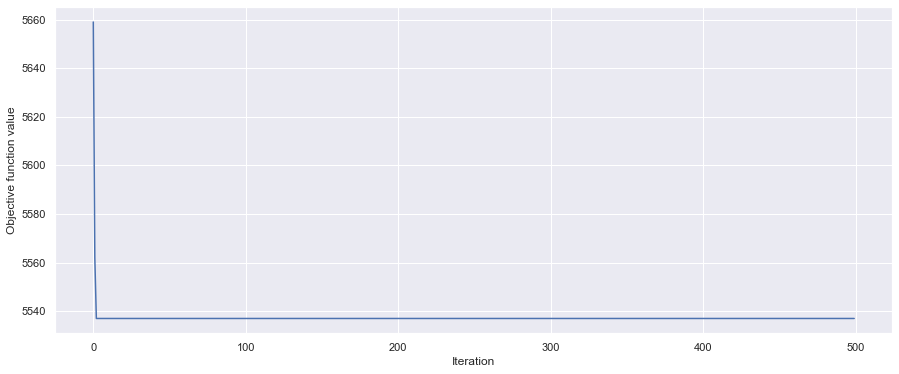

In [8]:
plt.figure(figsize=(15,6))
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.plot(range(outer_iter),all_cost)